In [1]:
#some graph_depictions
import networkx as nx
import pandas as pd

In [2]:
orders_data = pd.read_csv('./orders.csv')
distance_matrix = pd.read_csv('./distance_matrix.csv', index_col=0)
G = nx.Graph()

In [3]:
distance_matrix

Kraków   Białystok  Bielsko-Biała    Chrzanów  \
Kraków              0.000000  477.395329     102.318127   59.955709   
Białystok         477.395329    0.000000     570.589737  518.682870   
Bielsko-Biała     102.318127  570.589737       0.000000   52.024945   
Chrzanów           59.955709  518.682870      52.024945    0.000000   
Gdańsk            475.243743  502.064756     485.320986  455.486086   
Gdynia            492.744242  532.182685     497.323453  469.958469   
Gliwice           143.427236  578.670550      65.148707   83.525251   
Gromnik           586.162733  798.404458     536.286383  537.589121   
Katowice          103.867476  546.710235      46.090606   44.189066   
Kielce            111.476181  366.890431     204.778099  153.499003   
Krosno            205.683266  385.832346     301.500299  265.582465   
Krynica           508.881355   49.966609     604.802755  553.231187   
Lublin            317.652130  202.732142     419.150928  370.529797   
Łódź              186.476760  433.778901     209.423337  170.773014   
Malbork           427.609900  466.215935     442.148595  410.164669   
Nowy Targ          60.673293  511.733523     114.572409   97.284149   
Olsztyn           392.268405  304.280200     443.425270  398.356699   
Poznań            416.416679  696.591193     360.835557  364.985113   
Puławy            268.231420  217.258061     367.153843  316.737237   
Radom             194.412753  284.027800     286.757557  234.991530   
Rzeszów           229.949714  341.738721     329.880194  289.515534   
Sandomierz        211.520017  295.711197     313.724886  266.880336   
Szczecin          697.483941  956.370636     630.173712  642.897234   
Szczucin          129.162903  370.627350     231.412140  186.774973   
Szklarska Poręba  504.743164  889.086189     412.897179  444.803213   
Tarnów            114.281075  401.330630     214.461773  174.014273   
Warszawa          255.441751  255.254343     333.108365  281.783813   
Wieliczka          16.039584  472.756922     114.140161   74.961448   
Wrocław           341.281356  711.773997     261.864710  282.677192   
Zakopane           79.980723  532.187822     114.761770  107.340907   
Zamość            375.702528  246.236577     477.831429  433.034552   

                      Gdańsk      Gdynia     Gliwice     Gromnik    Katowice  \
Kraków            475.243743  492.744242  143.427236  586.162733  103.867476   
Białystok         502.064756  532.182685  578.670550  798.404458  546.710235   
Bielsko-Biała     485.320986  497.323453   65.148707  536.286383   46.090606   
Chrzanów          455.486086  469.958469   83.525251  537.589121   44.189066   
Gdańsk              0.000000   30.144525  435.643374  320.833157  439.233786   
Gdynia             30.144525    0.000000  445.185077  295.463860  451.283759   
Gliwice           435.643374  445.185077    0.000000  471.164896   39.732701   
Gromnik           320.833157  295.463860  471.164896    0.000000  499.502142   
Katowice          439.233786  451.283759   39.732701  499.502142    0.000000   
Kielce            424.968971  447.400795  223.994030  597.025843  187.230291   
Krosno            593.549052  617.666576  349.098234  769.330685  309.544633   
Krynica           551.871391  581.978966  616.638600  848.082042  583.379332   
Lublin            533.995485  562.443630  445.405153  776.754238  407.787985   
Łódź              288.889711  306.343217  178.211185  438.232239  165.637193   
Malbork            49.894355   75.608358  395.175596  340.524618  396.168682   
Nowy Targ         535.697191  552.879628  173.264198  634.854646  137.860964   
Olsztyn           198.840402  228.967046  416.787721  499.067733  402.075637   
Poznań            299.507365  287.548917  295.687629  175.997244  325.399605   
Puławy            472.734555  500.606689  387.529996  709.486402  351.219858   
Radom             410.654670  436.510930  299.970536  624.686034  265.443942   
Rzeszów           580.073729  605.446783  372.241168  773.543943  332

In [4]:
G.add_nodes_from([
    ('Kraków', {'lat': 54, 'lng': '23', 'order': 0}), 
    ('Warszawa', {'lat': 65, 'lng': '34', 'order': 20})
])

In [5]:
G.add_edge('Kraków', 'Warszawa')


In [6]:
print(G)

Graph with 2 nodes and 1 edges


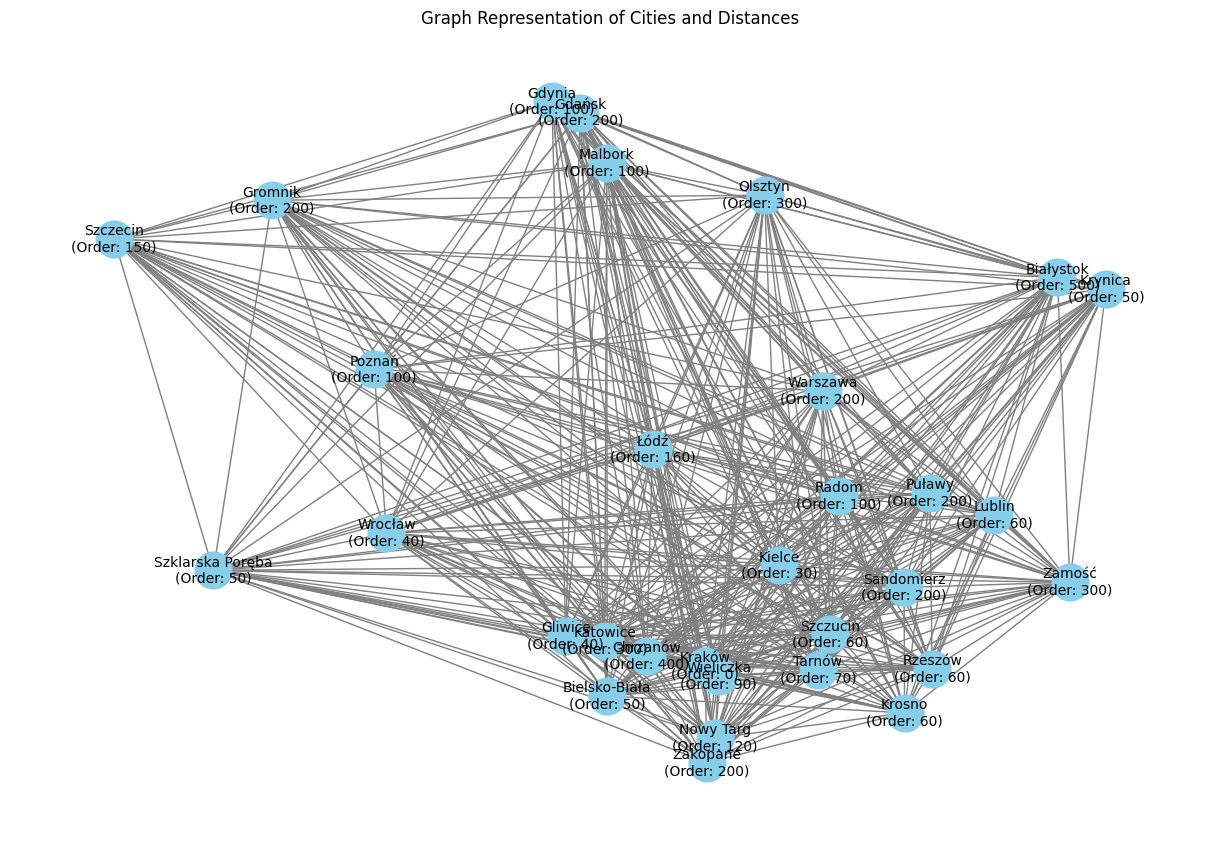

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (cities)
for city in orders_data['city']:
    G.add_node(city, 
               weight=orders_data[orders_data['city'] == city]['order'].values[0],
               pos=(orders_data[orders_data['city'] == city]['longitude'].values[0],
                          orders_data[orders_data['city'] == city]['latitude'].values[0]))

# Add edges (distances between cities)
for city1 in orders_data['city']:
    for city2 in orders_data['city']:
        if city1 != city2:
            G.add_edge(city1, city2, weight=distance_matrix.at[city1, city2])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.get_node_attributes(G, 'pos')
node_labels = {node: f"{node}\n(Order: {G.nodes[node]['weight']})" for node in G.nodes}
nx.draw(G, pos, labels=node_labels, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=10)
plt.title('Graph Representation of Cities and Distances')
plt.show()


In [20]:
print(G.nodes)

['Kraków', 'Białystok', 'Bielsko-Biała', 'Chrzanów', 'Gdańsk', 'Gdynia', 'Gliwice', 'Gromnik', 'Katowice', 'Kielce', 'Krosno', 'Krynica', 'Lublin', 'Łódź', 'Malbork', 'Nowy Targ', 'Olsztyn', 'Poznań', 'Puławy', 'Radom', 'Rzeszów', 'Sandomierz', 'Szczecin', 'Szczucin', 'Szklarska Poręba', 'Tarnów', 'Warszawa', 'Wieliczka', 'Wrocław', 'Zakopane', 'Zamość']


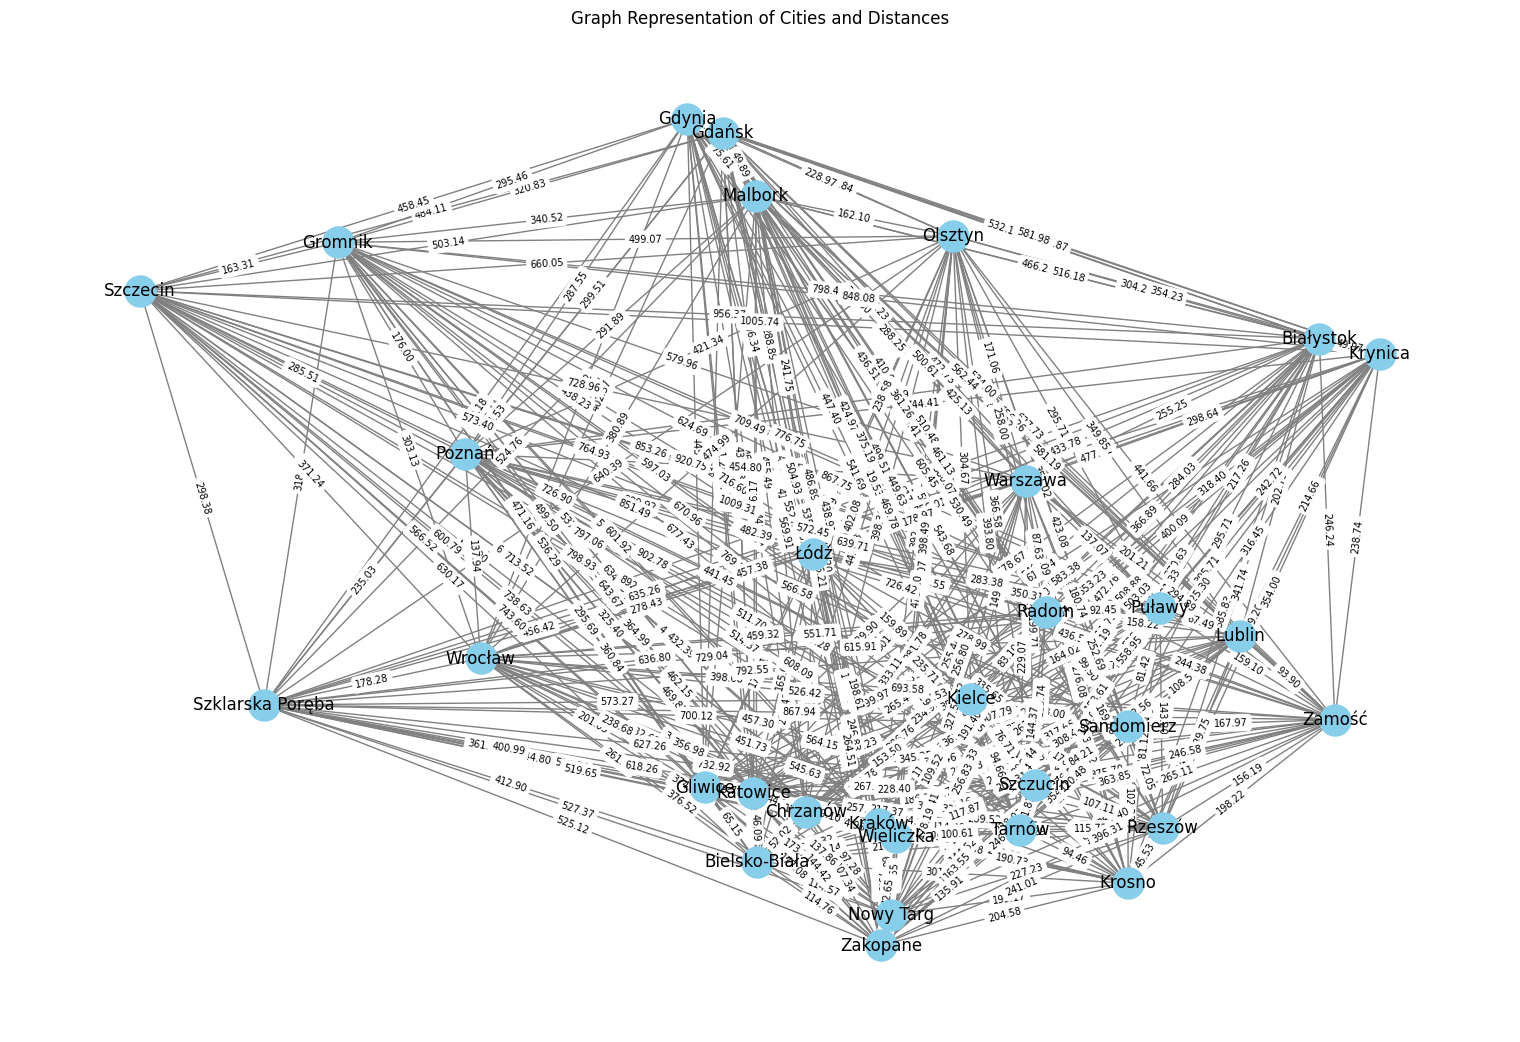

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (cities)
for city in orders_data['city']:
    G.add_node(city, 
               weight=orders_data[orders_data['city'] == city]['order'].values[0],
               pos=(orders_data[orders_data['city'] == city]['longitude'].values[0],
                          orders_data[orders_data['city'] == city]['latitude'].values[0]))

# Add edges (distances between cities)
for city1 in orders_data['city']:
    for city2 in orders_data['city']:
        if city1 != city2:
            G.add_edge(city1, city2, weight=distance_matrix.at[city1, city2])

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')

# Annotate edges with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
for edge, weight in edge_labels.items():
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(edge[0], edge[1]): f"{weight:.2f}"}, font_size=7)

plt.title('Graph Representation of Cities and Distances')
plt.show()

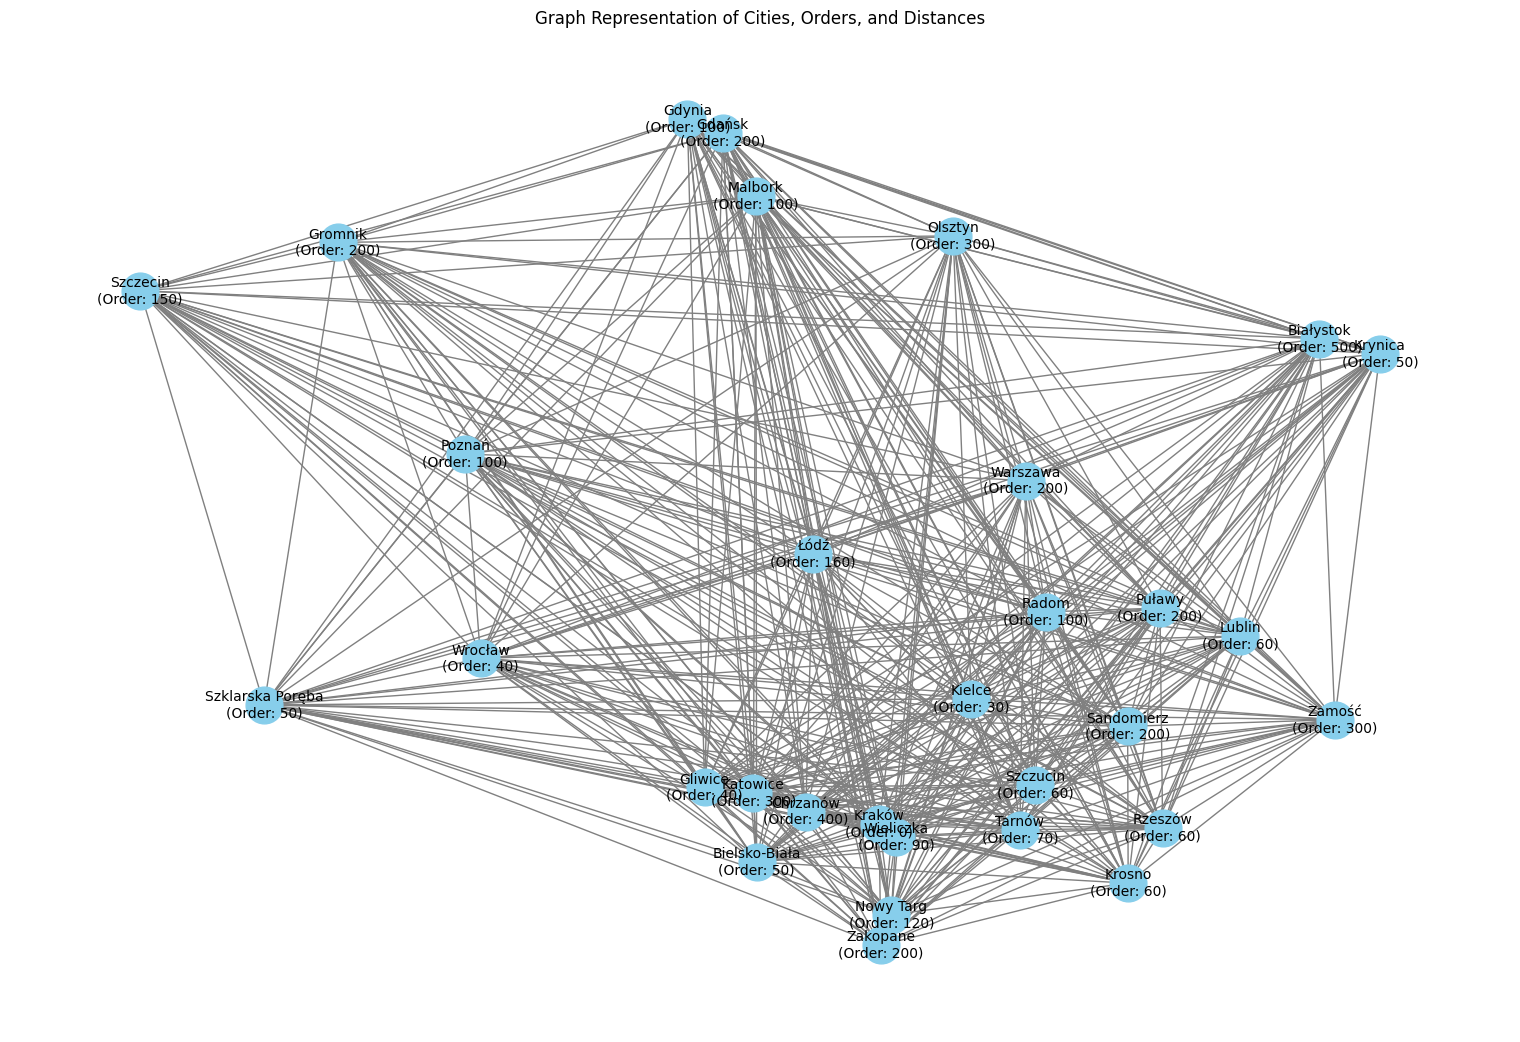

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (cities) with orders as an attribute
for city in orders_data['city']:
    order = orders_data[orders_data['city'] == city]['order'].values[0]
    G.add_node(city, pos=(orders_data[orders_data['city'] == city]['longitude'].values[0],
                          orders_data[orders_data['city'] == city]['latitude'].values[0]),
               order=order)

# Add edges (distances between cities)
for city1 in orders_data['city']:
    for city2 in orders_data['city']:
        if city1 != city2:
            G.add_edge(city1, city2, weight=distance_matrix.at[city1, city2])

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.get_node_attributes(G, 'pos')

# Create custom node labels with city name and order
node_labels = {node: f"{node}\n(Order: {G.nodes[node]['order']})" for node in G.nodes}
nx.draw(G, pos, labels=node_labels, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=10)

plt.title('Graph Representation of Cities, Orders, and Distances')
plt.show()


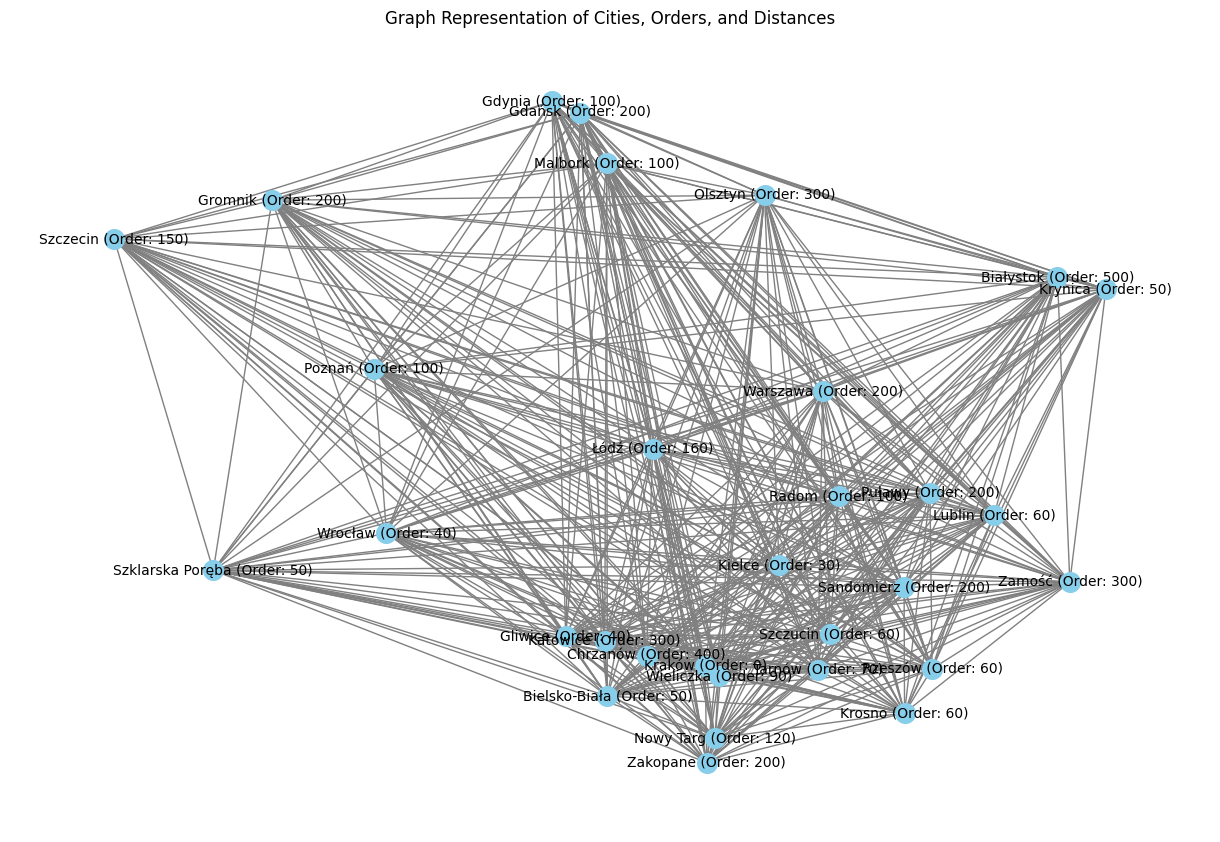

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (cities) with orders as an attribute
for city in orders_data['city']:
    order = orders_data[orders_data['city'] == city]['order'].values[0]
    G.add_node(city, pos=(orders_data[orders_data['city'] == city]['longitude'].values[0],
                          orders_data[orders_data['city'] == city]['latitude'].values[0]),
               order=order)

# Add edges (distances between cities)
for city1 in orders_data['city']:
    for city2 in orders_data['city']:
        if city1 != city2:
            G.add_edge(city1, city2, weight=distance_matrix.at[city1, city2])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.get_node_attributes(G, 'pos')

# Create custom node labels with city name and order (on the same line)
node_labels = {node: f"{node} (Order: {G.nodes[node]['order']})" for node in G.nodes}
nx.draw(G, pos, labels=node_labels, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray', font_size=10)

plt.title('Graph Representation of Cities, Orders, and Distances')
plt.show()


In [13]:
print(G)

Graph with 31 nodes and 0 edges
